In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

In [10]:
dx = 0.25
savecsv = False

In [36]:
modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical', 'oldVentilator']
diams = ['10um','30um','50um']
timesteps = [300,600,900]

In [205]:
case = 4
diam = 1
timestep = 1

mode = 1
area = 1

In [52]:
root = os.path.dirname(os.getcwd())
datalocation = cases[case-1] + '_' + diams[diam-1]
foldername = '../'+ datalocation + '/' + modes[mode-1]

In [81]:
timestep = timesteps[timestep-1]

In [82]:
filename = foldername + '/planeoutput-' + str(int(timestep)) + '.0'

array = []
with open(filename,'r') as file:
    count=0
    for lines in file:
        count+=1
        if count>1:
            array.append(lines.split())
        else:
            indices = lines.split()

array = np.array(array).astype('float')

print('File has the following variables:')
for i,v in enumerate(indices):
    print(i, '-', v, '-', array[0,i])

File has the following variables:
0 - nodenumber - 1.0
1 - x-coordinate - 0.0
2 - y-coordinate - 0.0
3 - z-coordinate - 0.0
4 - x-velocity - 0.0
5 - y-velocity - 0.0
6 - z-velocity - 0.0
7 - total-temperature - 294.089851
8 - dpm-concentration - 0.0
9 - num-virions-inhaled - 0.01609224615
10 - cell-volume - 0.002601191859


In [23]:
magnitude = array[:,9]

mag_max = np.amax(magnitude)
mag_min = np.amin(magnitude)

alpha = (magnitude - mag_min)/(mag_max - mag_min)
s = alpha*10

In [93]:
magnitude = array[:,7]

s = 2
alpha = 1

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(array[:,1],array[:,3],array[:,2],s=s,c=magnitude,alpha=alpha,cmap='viridis')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_zlim([0,3])
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.set_title('Raw CFD data before interpolation')

In [83]:
x = array[:,1]
y = array[:,2]
z = array[:,3]
xvelocity = array[:,4]
yvelocity = array[:,5]
zvelocity = array[:,6]
temperature = array[:,7]
dpm_concentration = array[:,8]
nvirions = array[:,9]
cell_vol = array[:,10]

exposure = np.array([nvirions[i]/cell_vol[i] for i in range(len(nvirions))])
k = 410
power = -1/k * exposure
prob_inf = 1 - np.exp(power)

In [84]:
p = 4.0 + 1e-10
q = 3.0 + 1e-10
r = 3.0 + 1e-10

grid_x, grid_y, grid_z = np.mgrid[dx/2:p-dx/2:dx, dx/2:q-dx/2:dx, dx/2:r-dx/2:dx]

grid_u = griddata((x, y, z), xvelocity, (grid_x, grid_y, grid_z), method='linear')
grid_v = griddata((x, y, z), yvelocity, (grid_x, grid_y, grid_z), method='linear')
grid_w = griddata((x, y, z), zvelocity, (grid_x, grid_y, grid_z), method='linear')
grid_t = griddata((x, y, z), temperature, (grid_x, grid_y, grid_z), method='linear')
grid_d = griddata((x, y, z), dpm_concentration, (grid_x, grid_y, grid_z), method='linear')
grid_n = griddata((x, y, z), nvirions, (grid_x, grid_y, grid_z), method='linear')
grid_e = griddata((x, y, z), exposure, (grid_x, grid_y, grid_z), method='linear')
grid_p = griddata((x, y, z), prob_inf, (grid_x, grid_y, grid_z), method='linear')

grid_u[np.isnan(grid_u)] = 0
grid_v[np.isnan(grid_v)] = 0
grid_w[np.isnan(grid_w)] = 0
grid_t[np.isnan(grid_t)] = 294
grid_d[np.isnan(grid_d)] = 0
grid_n[np.isnan(grid_n)] = 0
grid_e[np.isnan(grid_e)] = 0
grid_p[np.isnan(grid_p)] = 0

In [85]:
grid_x_save = (grid_x[:,4,:] + grid_x[:,5,:])/2
grid_z_save = (grid_z[:,4,:] + grid_z[:,5,:])/2
grid_d_save = (grid_d[:,4,:] + grid_d[:,5,:])/2
grid_n_save = (grid_n[:,4,:] + grid_n[:,5,:])/2

rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

filename1 = rootname + '/gridx_%d.csv' %timestep
filename2 = rootname + '/gridz_%d.csv' %timestep
filename3 = rootname + '/gridd_%d.csv' %timestep
filename4 = rootname + '/gridn_%d.csv' %timestep

np.savetxt(filename1,grid_x_save)
np.savetxt(filename2,grid_z_save)
np.savetxt(filename3,grid_d_save)
np.savetxt(filename4,grid_n_save)

print(grid_n_save[0,:])

[1.41101499 2.20424633 2.16644757 2.04449869 1.87159913 1.92177309
 1.86725424 2.01369741 1.96362627 2.01006031 2.1719741  1.96167547]


In [91]:
def automate(case,diam,timestep):

    modes = ['Plane Output','Decay']
    areas = ['Whole Domain','Table','Mouth Layer']
    cases = ['closedRoom','natural','mechanical', 'oldVentilator']
    diams = ['10um','30um','50um']
    timesteps = [300,600,900]

    mode = 1
    area = 1

    root = os.path.dirname(os.getcwd())
    datalocation = cases[case-1] + '_' + diams[diam-1]
    foldername = '../'+ datalocation + '/' + modes[mode-1]
    timestep = timesteps[timestep-1]

    filename = foldername + '/planeoutput-' + str(int(timestep)) + '.0'

    print(foldername,timestep)

    array = []
    with open(filename,'r') as file:
        count=0
        for lines in file:
            count+=1
            if count>1:
                array.append(lines.split())
            else:
                indices = lines.split()

    array = np.array(array).astype('float')

    x = array[:,1]
    y = array[:,2]
    z = array[:,3]
    xvelocity = array[:,4]
    yvelocity = array[:,5]
    zvelocity = array[:,6]
    temperature = array[:,7]
    dpm_concentration = array[:,8]
    nvirions = array[:,9]
    cell_vol = array[:,10]

    exposure = np.array([nvirions[i]/cell_vol[i] for i in range(len(nvirions))])
    k = 410
    power = -1/k * exposure
    prob_inf = 1 - np.exp(power)

    p = 4.0 + 1e-10
    q = 3.0 + 1e-10
    r = 3.0 + 1e-10

    grid_x, grid_y, grid_z = np.mgrid[dx/2:p-dx/2:dx, dx/2:q-dx/2:dx, dx/2:r-dx/2:dx]

    grid_u = griddata((x, y, z), xvelocity, (grid_x, grid_y, grid_z), method='linear')
    grid_v = griddata((x, y, z), yvelocity, (grid_x, grid_y, grid_z), method='linear')
    grid_w = griddata((x, y, z), zvelocity, (grid_x, grid_y, grid_z), method='linear')
    grid_t = griddata((x, y, z), temperature, (grid_x, grid_y, grid_z), method='linear')
    grid_d = griddata((x, y, z), dpm_concentration, (grid_x, grid_y, grid_z), method='linear')
    grid_n = griddata((x, y, z), nvirions, (grid_x, grid_y, grid_z), method='linear')
    grid_e = griddata((x, y, z), exposure, (grid_x, grid_y, grid_z), method='linear')
    grid_p = griddata((x, y, z), prob_inf, (grid_x, grid_y, grid_z), method='linear')

    grid_u[np.isnan(grid_u)] = 0
    grid_v[np.isnan(grid_v)] = 0
    grid_w[np.isnan(grid_w)] = 0
    grid_t[np.isnan(grid_t)] = 294
    grid_d[np.isnan(grid_d)] = 0
    grid_n[np.isnan(grid_n)] = 0
    grid_e[np.isnan(grid_e)] = 0
    grid_p[np.isnan(grid_p)] = 0

    grid_x_save = (grid_x[:,4,:] + grid_x[:,5,:])/2
    grid_z_save = (grid_z[:,4,:] + grid_z[:,5,:])/2
    grid_d_save = (grid_d[:,4,:] + grid_d[:,5,:])/2
    grid_n_save = (grid_n[:,4,:] + grid_n[:,5,:])/2

    rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

    filename1 = rootname + '/gridx_%d.csv' %timestep
    filename2 = rootname + '/gridz_%d.csv' %timestep
    filename3 = rootname + '/gridd_%d.csv' %timestep
    filename4 = rootname + '/gridn_%d.csv' %timestep

    np.savetxt(filename1,grid_x_save)
    np.savetxt(filename2,grid_z_save)
    np.savetxt(filename3,grid_d_save)
    np.savetxt(filename4,grid_n_save)

    print(grid_n_save[0,:])
    

In [ ]:
def automate2(case,diam,timestep):

    modes = ['Plane Output','Decay']
    areas = ['Whole Domain','Table','Mouth Layer']
    cases = ['closedRoom','natural','mechanical', 'oldVentilator']
    diams = ['10um','30um','50um']
    timesteps = [300,600,900]

    mode = 2
    area = 1

    root = os.path.dirname(os.getcwd())
    datalocation = cases[case-1] + '_' + diams[diam-1]
    foldername = '../'+ datalocation + '/' + modes[mode-1]
    timestep = timesteps[timestep-1]

    filename = foldername + '/planeoutput-' + str(int(timestep)) + '.0'

    print(foldername,timestep)

    array = []
    with open(filename,'r') as file:
        count=0
        for lines in file:
            count+=1
            if count>1:
                array.append(lines.split())
            else:
                indices = lines.split()

    array = np.array(array).astype('float')

    x = array[:,1]
    y = array[:,2]
    z = array[:,3]
    xvelocity = array[:,4]
    yvelocity = array[:,5]
    zvelocity = array[:,6]
    temperature = array[:,7]
    dpm_concentration = array[:,8]
    nvirions = array[:,9]
    cell_vol = array[:,10]

    exposure = np.array([nvirions[i]/cell_vol[i] for i in range(len(nvirions))])
    k = 410
    power = -1/k * exposure
    prob_inf = 1 - np.exp(power)

    p = 4.0 + 1e-10
    q = 3.0 + 1e-10
    r = 3.0 + 1e-10

    grid_x, grid_y, grid_z = np.mgrid[dx/2:p-dx/2:dx, dx/2:q-dx/2:dx, dx/2:r-dx/2:dx]

    grid_u = griddata((x, y, z), xvelocity, (grid_x, grid_y, grid_z), method='linear')
    grid_v = griddata((x, y, z), yvelocity, (grid_x, grid_y, grid_z), method='linear')
    grid_w = griddata((x, y, z), zvelocity, (grid_x, grid_y, grid_z), method='linear')
    grid_t = griddata((x, y, z), temperature, (grid_x, grid_y, grid_z), method='linear')
    grid_d = griddata((x, y, z), dpm_concentration, (grid_x, grid_y, grid_z), method='linear')
    grid_n = griddata((x, y, z), nvirions, (grid_x, grid_y, grid_z), method='linear')
    grid_e = griddata((x, y, z), exposure, (grid_x, grid_y, grid_z), method='linear')
    grid_p = griddata((x, y, z), prob_inf, (grid_x, grid_y, grid_z), method='linear')

    grid_u[np.isnan(grid_u)] = 0
    grid_v[np.isnan(grid_v)] = 0
    grid_w[np.isnan(grid_w)] = 0
    grid_t[np.isnan(grid_t)] = 294
    grid_d[np.isnan(grid_d)] = 0
    grid_n[np.isnan(grid_n)] = 0
    grid_e[np.isnan(grid_e)] = 0
    grid_p[np.isnan(grid_p)] = 0

    grid_x_save = (grid_x[:,4,:] + grid_x[:,5,:])/2
    grid_z_save = (grid_z[:,4,:] + grid_z[:,5,:])/2
    grid_d_save = (grid_d[:,4,:] + grid_d[:,5,:])/2
    grid_n_save = (grid_n[:,4,:] + grid_n[:,5,:])/2

    rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

    filename1 = rootname + '/gridx_%d.csv' %timestep
    filename2 = rootname + '/gridz_%d.csv' %timestep
    filename3 = rootname + '/gridd_%d.csv' %timestep
    filename4 = rootname + '/gridn_%d.csv' %timestep

    np.savetxt(filename1,grid_x_save)
    np.savetxt(filename2,grid_z_save)
    np.savetxt(filename3,grid_d_save)
    np.savetxt(filename4,grid_n_save)

    print(grid_n_save[0,:])
    

7.880224773186976


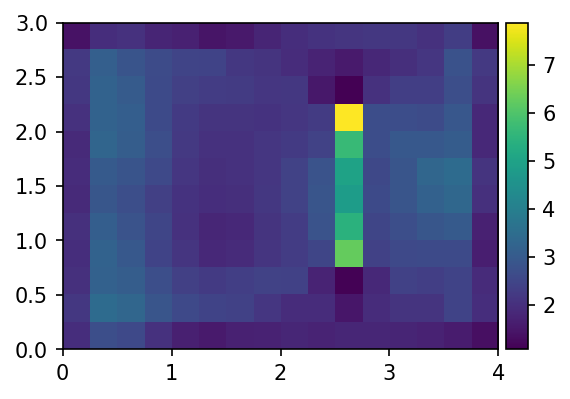

In [104]:
plt.figure(figsize=(4,3),dpi=150)
ax = plt.gca()
im = ax.imshow(grid_n_save.T,extent=[0,4,0,3])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
   
plt.colorbar(im, cax=cax)

In [206]:
for k in range(4,5):
    
    # if k == 2:
    #     start=2
    # else:

    start=1


    for i in range(start,4):
        if i==3:
            lim=3
        else:
            lim=4
        
        for j in range(1,lim):
            automate(k,i,j)

../oldVentilator_10um/Plane Output 300
[0.05531352 0.10895585 0.15040231 0.29924661 0.3825435  0.40195666
 0.36760219 0.34476793 0.20779629 0.12795595 0.09437037 0.03903567]
../oldVentilator_10um/Plane Output 600
[0.17365489 0.32936566 0.42989235 0.97948703 1.34225026 1.29306873
 0.98587589 0.82971445 0.51056619 0.37957883 0.30118892 0.1513406 ]
../oldVentilator_10um/Plane Output 900
[0.34256966 0.62702524 0.75045387 1.68901514 2.37759685 2.370507
 1.71090257 1.36460871 0.82335479 0.62232351 0.5167615  0.27785954]
../oldVentilator_30um/Plane Output 300
[0.16253612 0.23132075 0.24035155 0.27434494 0.25996875 0.2055129
 0.18411587 0.18737462 0.20991146 0.21181198 0.19034681 0.09058634]
../oldVentilator_30um/Plane Output 600
[0.3917433  0.5070805  0.45656935 0.50473241 0.50665565 0.4458561
 0.53092843 0.60556201 0.48355813 0.49591802 0.4889313  0.28882779]
../oldVentilator_30um/Plane Output 900
[0.54514136 0.68124918 0.60611287 0.6929055  0.67893115 0.65345726
 0.91178678 1.07601876 0.832

FileNotFoundError: [Errno 2] No such file or directory: '../oldVentilator_50um/Plane Output/planeoutput-300.0'

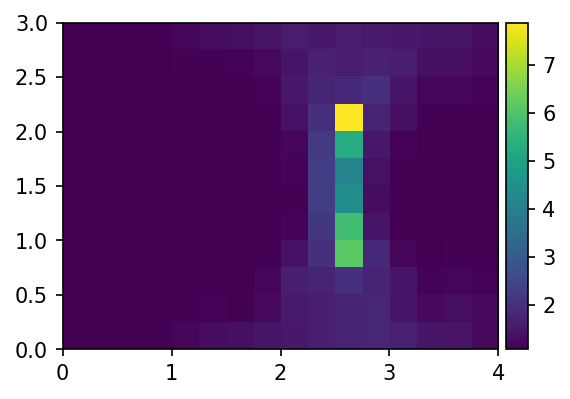

In [112]:
modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical', 'oldVentilator']
diams = ['10um','30um','50um']
timesteps = [300,600,900]

mode = 1
area = 1
case = 2
diam = 3

rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1] 

timestep = 300
filename1 = rootname + '/gridn_%d.csv' %timestep

timestep = 600
filename2 = rootname + '/gridn_%d.csv' %timestep

nvirarray_300 = np.array(pd.read_csv(filename1, header=None, delimiter=' '))
nvirarray_600 = np.array(pd.read_csv(filename2, header=None, delimiter=' '))

nvirdelta_300 = nvirarray_600 - nvirarray_300
nvirarray_900 = nvirarray_600 + 1*nvirdelta_300

timestep = 900
filename3 = rootname + '/gridn_%d.csv' %timestep
np.savetxt(filename3,nvirarray_900)

nvirarray_3600 = nvirarray_600 + 10*nvirdelta_300

plt.figure(figsize=(4,3),dpi=150)
ax = plt.gca()
ax.imshow(nvirarray_3600.T,extent=[0,4,0,3])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

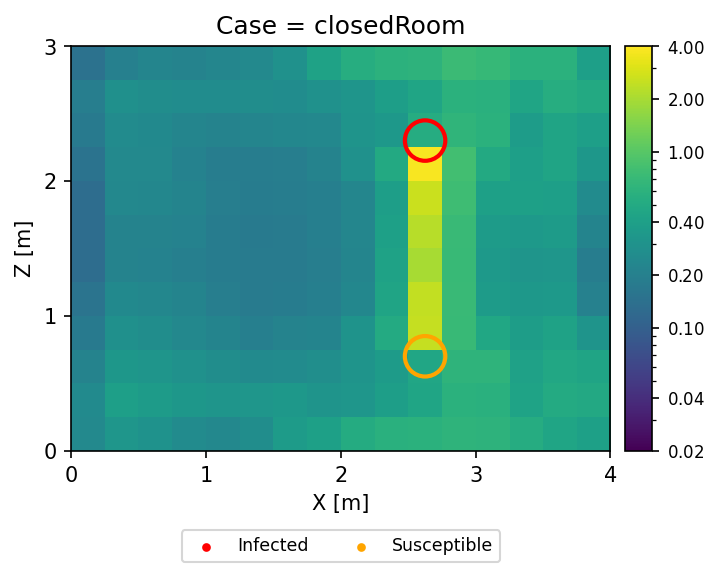

In [213]:
from matplotlib.colors import LogNorm

modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical', 'oldVentilator']
diams = ['10um','30um','50um']
timesteps = [300,600,900]

mode = 1
area = 1

case = 1

diam = 1
rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

timestep = 600
filename1 = rootname + '/gridn_%d.csv' %timestep
nvirarray1_600 = np.array(pd.read_csv(filename1, header=None, delimiter=' '))

timestep = 900
filename2 = rootname + '/gridn_%d.csv' %timestep
nvirarray1_900 = np.array(pd.read_csv(filename2, header=None, delimiter=' '))

# -------------------------------------------------------------------------

diam = 2
rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

timestep = 600
filename1 = rootname + '/gridn_%d.csv' %timestep
nvirarray2_600 = np.array(pd.read_csv(filename1, header=None, delimiter=' '))

timestep = 900
filename2 = rootname + '/gridn_%d.csv' %timestep
nvirarray2_900 = np.array(pd.read_csv(filename2, header=None, delimiter=' '))

# -------------------------------------------------------------------------

diam = 3
rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

timestep = 600
filename1 = rootname + '/gridn_%d.csv' %timestep
nvirarray3_600 = np.array(pd.read_csv(filename1, header=None, delimiter=' '))

timestep = 900
filename2 = rootname + '/gridn_%d.csv' %timestep
nvirarray3_900 = np.array(pd.read_csv(filename2, header=None, delimiter=' '))

# -------------------------------------------------------------------------

nvirarray_600 = nvirarray1_600 + nvirarray2_600 + nvirarray3_600
nvirarray_900 = nvirarray1_900 + nvirarray2_900 + nvirarray3_900

nvirdelta_300 = nvirarray_900 - nvirarray_600
nvirarray_1800 = nvirarray_900 + 3*nvirdelta_300
nvirarray_3600 = nvirarray_900 + 9*nvirdelta_300

exposure_600 = nvirarray_600/16000
exposure_1800 = nvirarray_1800/16000
exposure_3600 = nvirarray_3600/16000

k = 410

power = -1/k * exposure_600
prob_600 = 1 - np.exp(power)
prob_600 = prob_600 * 100 * 750

power = -1/k * exposure_1800
prob_1800 = 1 - np.exp(power)
prob_1800 = prob_1800 * 100 * 750

power = -1/k * exposure_3600
prob_3600 = 1 - np.exp(power)
prob_3600 = prob_3600 * 100 * 750

plt.figure(num=1,figsize=(5,4.5),dpi=150)
ax = plt.gca()
im=ax.imshow(prob_3600.T,extent=[0,4,0,3],norm=LogNorm(vmin=2e-2, vmax=4),origin='upper')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.xticks([0,1,2,3,4])
plt.yticks([0,1,2,3])
plt.title('Case = %s' %cases[case-1])
circle = plt.Circle((2.625, 0.7), radius=0.15, edgecolor='orange', fill=False,linewidth=2)
circle2 = plt.Circle((2.625, 2.3), radius=0.15, edgecolor='r', fill=False,linewidth=2)
plt.scatter([-10],[-10],alpha=1, s=10, c='r', label="Infected")
plt.scatter([-10],[-10],alpha=1, s=10, c='orange', label="Susceptible")
plt.xlim([0,4])
plt.ylim([0,3])
ax.add_artist(circle)
ax.add_artist(circle2)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175),ncol=2,fontsize='small')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
t = [0.02, 0.04, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0]
cbar = plt.colorbar(im, cax=cax,ticks=t,format="$%.2f$")
cbar.ax.tick_params(labelsize=8)

In [172]:
from matplotlib.colors import LogNorm

modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical', 'oldVentilator']
diams = ['10um','30um','50um']
timesteps = [300,600,900]

mode = 2
area = 1

case = 3

diam = 1
rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

timestep = 600
filename1 = rootname + '/gridn_%d.csv' %timestep
nvirarray1_600 = np.array(pd.read_csv(filename1, header=None, delimiter=' '))

timestep = 900
filename2 = rootname + '/gridn_%d.csv' %timestep
nvirarray1_900 = np.array(pd.read_csv(filename2, header=None, delimiter=' '))

# -------------------------------------------------------------------------

diam = 2
rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

timestep = 600
filename1 = rootname + '/gridn_%d.csv' %timestep
nvirarray2_600 = np.array(pd.read_csv(filename1, header=None, delimiter=' '))

timestep = 900
filename2 = rootname + '/gridn_%d.csv' %timestep
nvirarray2_900 = np.array(pd.read_csv(filename2, header=None, delimiter=' '))

# -------------------------------------------------------------------------

diam = 3
rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

timestep = 600
filename1 = rootname + '/gridn_%d.csv' %timestep
nvirarray3_600 = np.array(pd.read_csv(filename1, header=None, delimiter=' '))

timestep = 900
filename2 = rootname + '/gridn_%d.csv' %timestep
nvirarray3_900 = np.array(pd.read_csv(filename2, header=None, delimiter=' '))

# -------------------------------------------------------------------------

nvirarray_600 = nvirarray1_600 + nvirarray2_600 + nvirarray3_600
nvirarray_900 = nvirarray1_900 + nvirarray2_900 + nvirarray3_900

nvirdelta_300 = nvirarray_900 - nvirarray_600
nvirarray_1800 = nvirarray_900 + 3*nvirdelta_300
nvirarray_3600 = nvirarray_900 + 9*nvirdelta_300

exposure_600 = nvirarray_600/16000
exposure_1800 = nvirarray_1800/16000
exposure_3600 = nvirarray_3600/16000

k = 410

power = -1/k * exposure_600
prob_600 = 1 - np.exp(power)
prob_600 = prob_600 * 100 * 750

power = -1/k * exposure_1800
prob_1800 = 1 - np.exp(power)
prob_1800 = prob_1800 * 100 * 750

power = -1/k * exposure_3600
prob_3600 = 1 - np.exp(power)
prob_3600 = prob_3600 * 100 * 750

plt.figure(num=1,figsize=(5,4.5),dpi=150)
ax = plt.gca()
im=ax.imshow(prob_1800.T,extent=[0,4,0,3],norm=LogNorm(vmin=2e-2, vmax=4))
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.xticks([0,1,2,3,4])
plt.yticks([0,1,2,3])
plt.title('Case = %s' %cases[case-1])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
t = [0.02, 0.04, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0]
cbar = plt.colorbar(im, cax=cax,ticks=t,format="$%.2f$")
cbar.ax.tick_params(labelsize=8)

FileNotFoundError: [Errno 2] No such file or directory: 'e:\\Studies\\COVIDProject\\OneProjectOutput\\COVIDVentilation/Output Files/mechanical/10um/Decay/Whole Domain/gridn_600.csv'

In [117]:
print(nvirarray_900[0] - nvirarray_3600[0])

[-10.58751517 -13.92981193 -12.55534364 -10.83768753  -9.38404819
  -9.36998351  -9.33959298 -11.08671631 -12.64234333 -15.54419413
 -18.53760649 -17.56977711]


In [14]:
xcoord = grid_x.flatten()
ycoord = grid_y.flatten()
zcoord = grid_z.flatten()
x_vel = grid_u.flatten()
y_vel = grid_v.flatten()
z_vel = grid_w.flatten()
ttemp = grid_t.flatten()
dpm_c = grid_d.flatten()
nv_in = grid_n.flatten()
exp_c = grid_e.flatten()
probc = grid_p.flatten()

In [62]:
s = 10
alpha = 1

In [66]:
magnitude = ttemp

mag_max = np.amax(magnitude)
mag_min = np.amin(magnitude)

alpha = (magnitude - mag_min)/(mag_max - mag_min)
s = alpha*10

ValueError: s must be a scalar, or float array-like with the same size as x and y

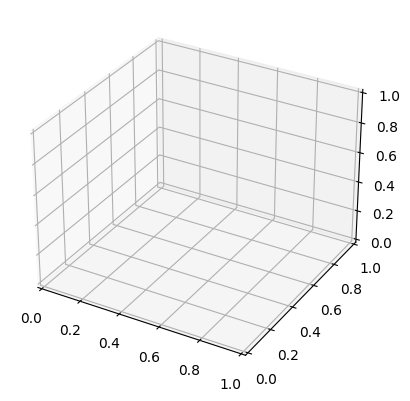

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xcoord,zcoord,ycoord,s=s,c=magnitude,alpha=alpha,cmap='jet')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_zlim([0,3])
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.set_title('Raw CFD data after interpolation')

In [73]:
yplane = 1.25

In [82]:
plane_x = []
plane_z = []
plane_d = []
plane_n = []
plane_p = []
plane_e = []

for i,v in enumerate(y):
    if v>yplane-0.25 and v<yplane+0.25:
        plane_x.append(x[i])
        plane_z.append(z[i])
        plane_d.append(dpm_concentration[i])
        plane_n.append(nvirions[i])
        plane_e.append(exposure[i])
        plane_p.append(prob_inf[i]*100)

plane_x = np.array(plane_x)
plane_z = np.array(plane_z)
plane_d = np.array(plane_d)
plane_n = np.array(plane_n)
plane_e = np.array(plane_e)
plane_p = np.array(plane_p)

m = 4.0 + 1e-10
n = 3.0 + 1e-10
dx = 0.1
grid_x, grid_z = np.mgrid[dx/2:m-dx/2:dx, dx/2:n-dx/2:dx]
grid_n = griddata((plane_x, plane_z), plane_n, (grid_x, grid_z), method='linear')
grid_d = griddata((plane_x, plane_z), plane_d, (grid_x, grid_z), method='linear')
grid_e = griddata((plane_x, plane_z), plane_e, (grid_x, grid_z), method='linear')
grid_p = griddata((plane_x, plane_z), plane_p, (grid_x, grid_z), method='linear')
grid_n[np.isnan(grid_n)] = 0
grid_d[np.isnan(grid_d)] = 0
grid_e[np.isnan(grid_e)] = 0
grid_p[np.isnan(grid_p)] = 0


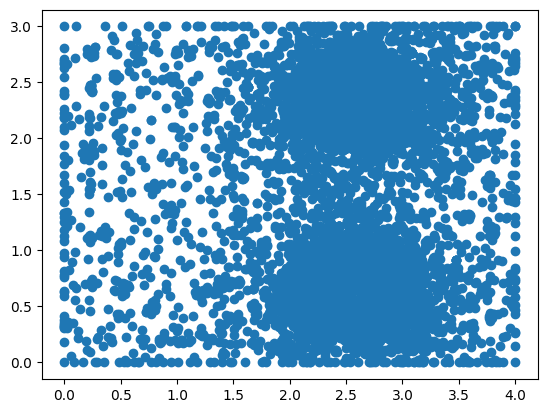

In [86]:
fig,ax = plt.subplots()
ax.scatter(plane_x,plane_z)

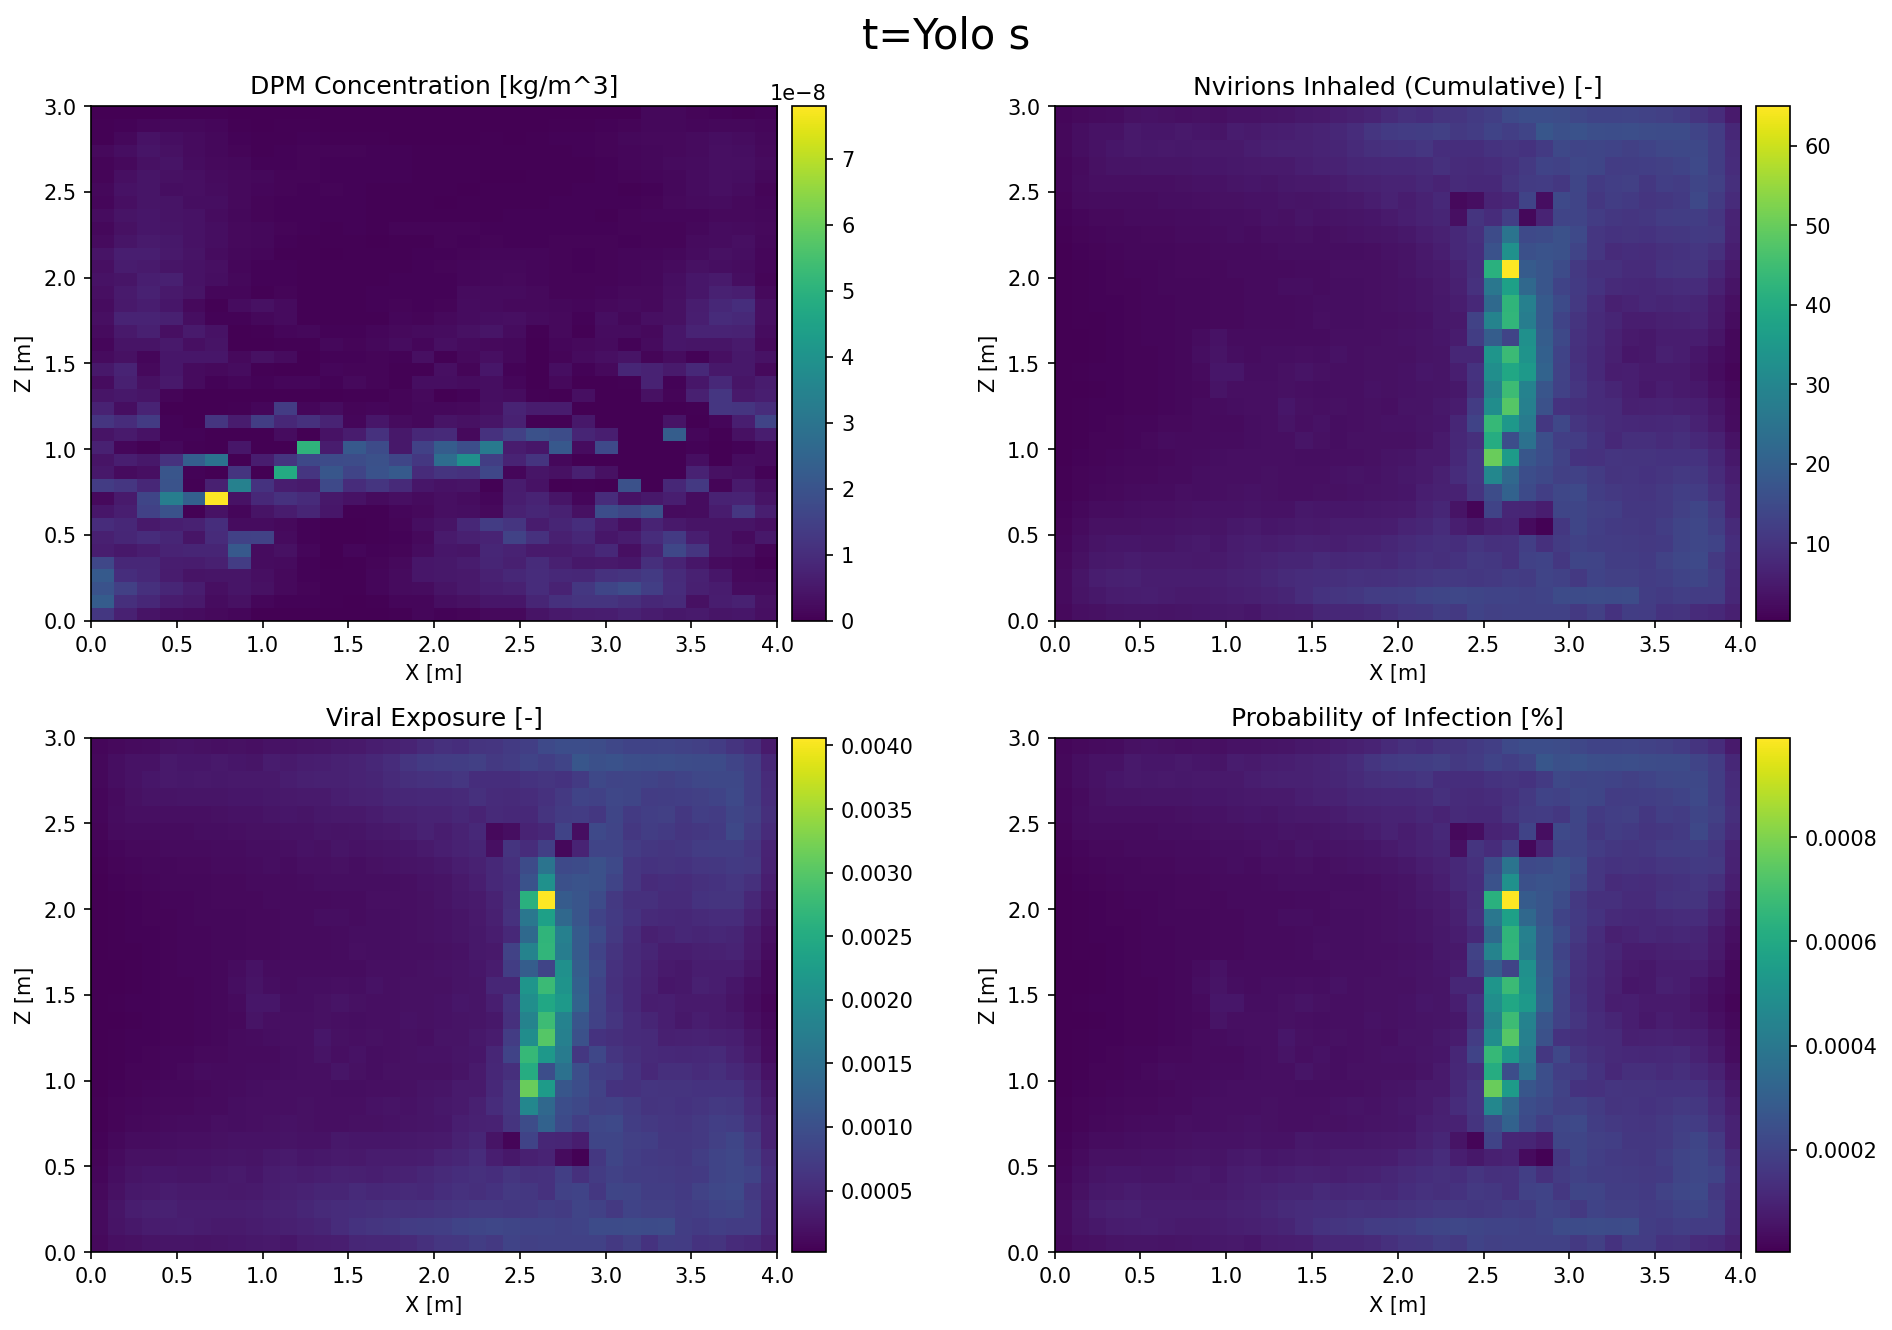

In [84]:
fig,axs = plt.subplots(2,2,figsize = (13,9), dpi=150)

axs = axs.flatten()

im1 = axs[0].imshow(grid_d,extent=[0,m,0,n])
axs[0].set_xlabel('X [m]')
axs[0].set_ylabel('Z [m]')
axs[0].set_title('DPM Concentration [kg/m^3]')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax)

im2 = axs[1].imshow(grid_n.T,extent=[0,m,0,n])
axs[1].set_xlabel('X [m]')
axs[1].set_ylabel('Z [m]')
axs[1].set_title('Nvirions Inhaled (Cumulative) [-]')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax)

im3 = axs[2].imshow(grid_e.T,extent=[0,m,0,n])
axs[2].set_xlabel('X [m]')
axs[2].set_ylabel('Z [m]')
axs[2].set_title('Viral Exposure [-]')
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im3, cax=cax)

im4 = axs[3].imshow(grid_p.T,extent=[0,m,0,n])
axs[3].set_xlabel('X [m]')
axs[3].set_ylabel('Z [m]')
axs[3].set_title('Probability of Infection [%]')
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im4, cax=cax)

# plt.suptitle('t=Yolo s', fontsize = 20)
plt.tight_layout()